In [11]:
import tweepy
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from  nltk.stem import WordNetLemmatizer
from  nltk.corpus   import  stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
#import tkinter

In [2]:
consumer_key="4wLmPjWk9lrrVBvJ8vrLOd7mw"
consumer_secret="coH45GqySYiQMdagJ2vlCSWuGw6g8oBC1SfaffzPSXE50xvg6c"
access_key="889506304225665024-R8JlY4yhbu5G9xRQl8A3Qh66aH5Xsgo"
access_secret="jUg8RcVbfbUOxSX4MSJA2BJ0MZ61x8JrC0EAkRWlDL6TO"

In [12]:
def get_tweets(topic):
    #authenticating twitter with consumer key and consumer  secret
    auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
    #setting access token
    auth.set_access_token(access_key,access_secret)
    #connecting bssetting access tokenpi
    api=tweepy.API(auth)
    #number_of_tweets=50
    tweets=api.search(q=topic,count=20,lang='en')
    tmp=[]
    polarity=[]
    subjectivity=[]

    tweets_for_csv=[tweet.text for tweet in tweets]
    for j in tweets_for_csv:
        tmp.append(j)
    #print("Extracted tweets:",tmp)
    #print("####################################")
    
    for j in tweets:
        analize=TextBlob(j.text)
        check=analize.sentiment
        #print(check)
        polarity.append(analize.sentiment[0])
        subjectivity.append(analize.sentiment[1])
        #lemmatization
    #print("####################################")
    #print(polarity)
    #print(subjectivity)
    '''lemma=WordNetLemmatizer()
    for i in range(len(tmp)):
        words=word_tokenize(tmp[i])
        newword=[lemma.lemmatize(word) for word in words]
        tmp[i]=' '.join(newword)
    #print(tmp)
    '''
    for i in range(1,len(polarity)+1):
        if(polarity[i-1]>0):
            plt.bar(i,polarity[i-1],color='b')
        else:
            plt.bar(i,polarity[i-1],color='g')
    plt.xlabel("Number of tweets")
    plt.ylabel("Opinion of the tweet")
    plt.show()
    for i in range(1,len(subjectivity)+1):
        plt.bar(i,subjectivity[i-1],color='r')
    plt.xlabel("Number of tweets")
    plt.ylabel("Subjectivity of the tweet")
    plt.show()

Enter topic: kohli


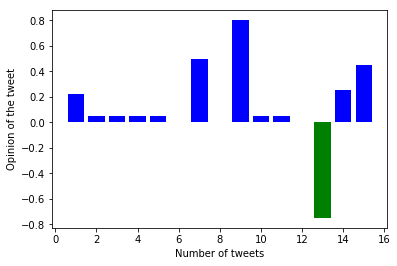

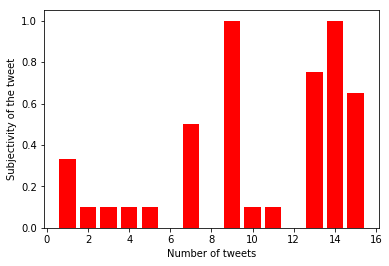

In [13]:
if __name__=='__main__':
    data=input("Enter topic: ")
get_tweets(data)